# General Setup

## Install Libraries

In [1]:
#! pip install numpy matplotlib scikit-learn 

## Import Libraries

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_circles, make_moons, load_iris, load_breast_cancer, make_classification, load_wine
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

To avoid repetitive code, we'll define a helper function to plot the decision boundaries for our models.

In [9]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

# Part 1: Basic SVM

## Create Fake Data

In [13]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

## Train.Test.spilit

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Creation

In [15]:
model_linear = SVC(kernel='linear')

model_linear.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Model Prediction

In [16]:
y_pred = model_linear.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Plot Decision Boundary

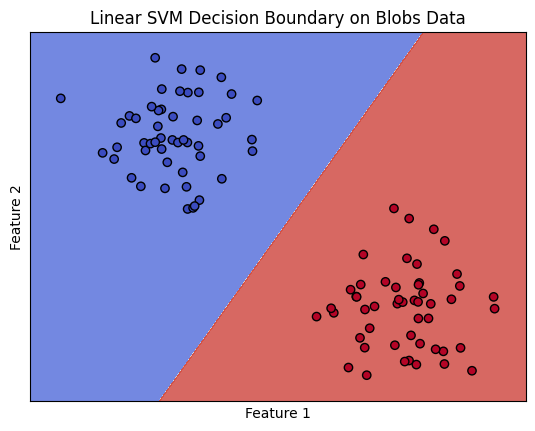

In [17]:
plot_decision_boundary(model_linear, X, y, "Linear SVM Decision Boundary on Blobs Data")

### Challenge: When Linear Fails

In [18]:
X_circles, y_circles = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

In [19]:
model_linear_circles = SVC(kernel='linear')
model_linear_circles.fit(X_train_c, y_train_c)

y_pred_c = model_linear_circles.predict(X_test_c)
accuracy_c = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy on Circles Data: {accuracy_c:.2f}")

Accuracy on Circles Data: 0.33


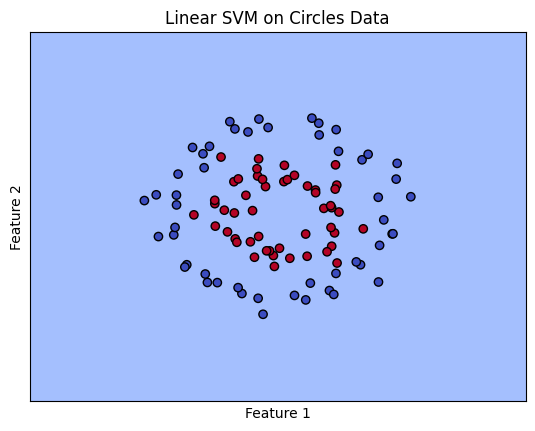

In [20]:
plot_decision_boundary(model_linear_circles, X_circles, y_circles, "Linear SVM on Circles Data")

Question 1: Why does the linear separator fail now?

وقتی که نویز اضافه کردیم و داده ها دایره ایی پخش شدن با خط نمتونیم جدا کنیم.

A linear separator fails because the make_circles dataset is not linearly separable. The data is arranged in two concentric circles, meaning you cannot draw a single straight line to separate the two classes correctly. The linear SVM attempts to find the best hyperplane (a line in 2D), but no such line can effectively divide the inner circle from the outer circle, resulting in very low accuracy.

### Challenge 2

In [22]:
X_moon, y_moon = make_moons(n_samples=100, noise=0.2, random_state=42) 

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_moon, y_moon, test_size=0.3, random_state=42)

In [23]:
model_linear_moon = SVC(kernel='linear')
model_linear_moon.fit(X_train_c, y_train_c)

y_pred_c = model_linear_moon.predict(X_test_c)
accuracy_c = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy on Circles Data: {accuracy_c:.2f}")

Accuracy on Circles Data: 0.87


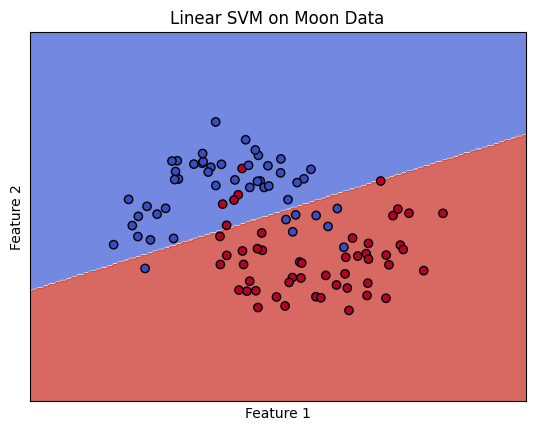

In [24]:
plot_decision_boundary(model_linear_moon, X_moon, y_moon, "Linear SVM on Moon Data")

Question 2: What separator would be more suitable for this data? Why?
A non-linear separator is required. Specifically, an SVM with a Radial Basis Function (RBF) kernel would be ideal. The RBF kernel can transform the 2D data into a higher-dimensional space where it becomes linearly separable. For the circles data, it can map the points so that a simple plane can separate them, effectively creating a circular or curved boundary in the original 2D space.

# Part 2: Play with Kernels

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

# Keep only class 1 and 2
X = X[y != 0, :2]
y = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train and Compare Kernels

### Create models with different kernels

In [26]:
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')
poly_svm = SVC(kernel='poly', degree=3)

### Train models

In [27]:
linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)
poly_svm.fit(X_train, y_train)

acc_linear = accuracy_score(y_test, linear_svm.predict(X_test))
acc_rbf = accuracy_score(y_test, rbf_svm.predict(X_test))
acc_poly = accuracy_score(y_test, poly_svm.predict(X_test))

print(f"Accuracy (Linear Kernel): {acc_linear:.2f}")
print(f"Accuracy (RBF Kernel): {acc_rbf:.2f}")
print(f"Accuracy (Poly Kernel): {acc_poly:.2f}")

Accuracy (Linear Kernel): 0.70
Accuracy (RBF Kernel): 0.63
Accuracy (Poly Kernel): 0.70


### Plot decision boundaries

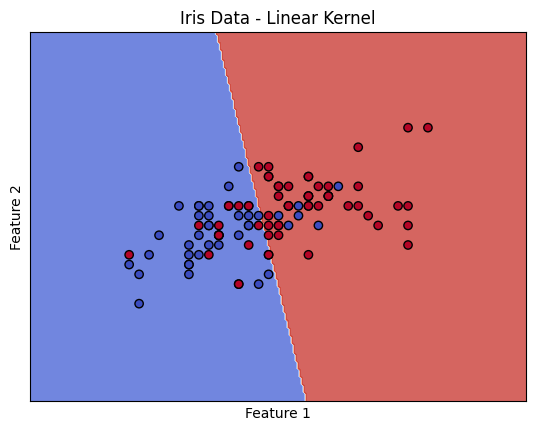

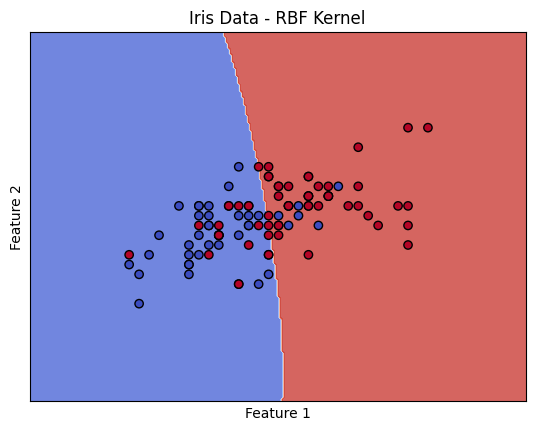

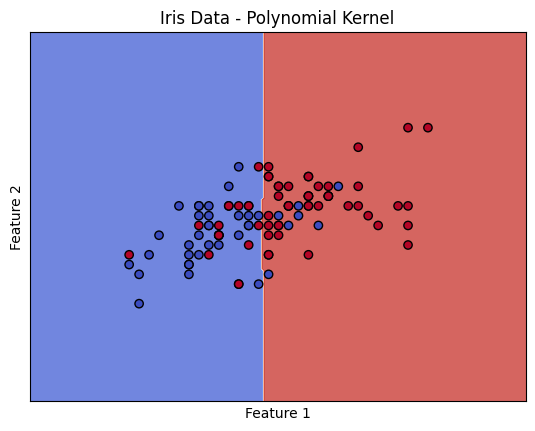

In [28]:
plot_decision_boundary(linear_svm, X, y, "Iris Data - Linear Kernel")
plot_decision_boundary(rbf_svm, X, y, "Iris Data - RBF Kernel")
plot_decision_boundary(poly_svm, X, y, "Iris Data - Polynomial Kernel")

### Challenge: Breast Cancer Dataset

In [30]:
cancer = load_breast_cancer()
X = cancer.data[:, 4:6]
y = cancer.target

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train models

In [31]:
linear_svm_bc = SVC(kernel='linear').fit(X_train_bc, y_train_bc)
rbf_svm_bc = SVC(kernel='rbf').fit(X_train_bc, y_train_bc)
poly_svm_bc = SVC(kernel='poly', degree=3).fit(X_train_bc, y_train_bc)

### Evaluate and print accuracies

In [32]:
acc_linear_bc = accuracy_score(y_test_bc, linear_svm_bc.predict(X_test_bc))
acc_rbf_bc = accuracy_score(y_test_bc, rbf_svm_bc.predict(X_test_bc))
acc_poly_bc = accuracy_score(y_test_bc, poly_svm_bc.predict(X_test_bc))

print(f"Breast Cancer Accuracy (Linear Kernel): {acc_linear_bc:.2f}")
print(f"Breast Cancer Accuracy (RBF Kernel): {acc_rbf_bc:.2f}")
print(f"Breast Cancer Accuracy (Poly Kernel): {acc_poly_bc:.2f}")

Breast Cancer Accuracy (Linear Kernel): 0.68
Breast Cancer Accuracy (RBF Kernel): 0.83
Breast Cancer Accuracy (Poly Kernel): 0.81


# Plot decision boundaries


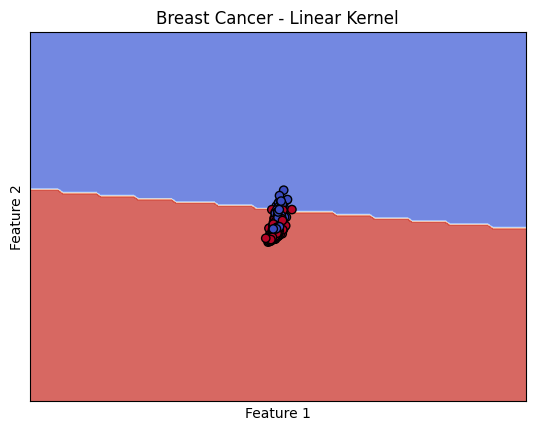

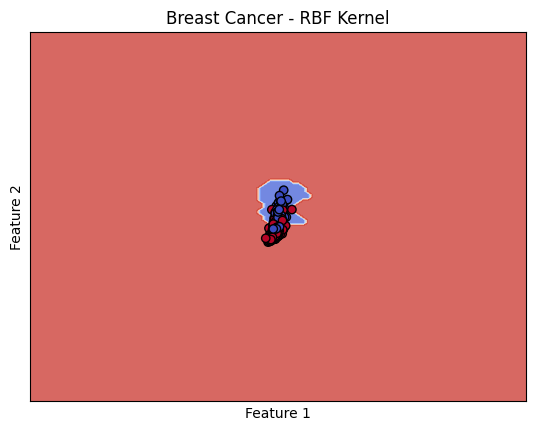

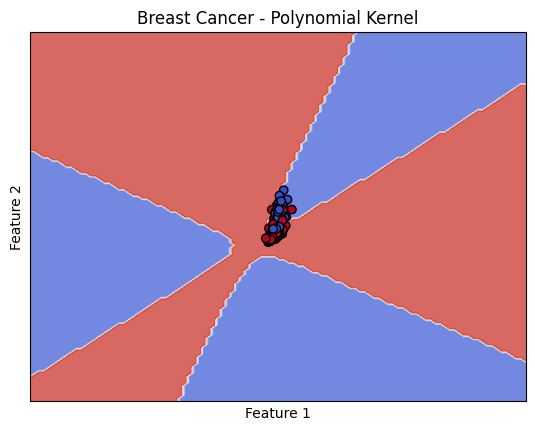

In [33]:
plot_decision_boundary(linear_svm_bc, X, y, "Breast Cancer - Linear Kernel")
plot_decision_boundary(rbf_svm_bc, X, y, "Breast Cancer - RBF Kernel")
plot_decision_boundary(poly_svm_bc, X, y, "Breast Cancer - Polynomial Kernel")

Question 3: Which kernel had the best performance? Why?
The RBF kernel typically performs best on the Breast Cancer dataset. This is because the decision boundary between malignant and benign tumors is complex and non-linear. The RBF kernel's ability to create flexible, non-linear boundaries allows it to capture the intricate separation between the classes more effectively than a rigid linear or polynomial kernel.

Question 4: Was the linear model sufficient? What does the data shape suggest?
The linear model was not sufficient. Although it achieved decent accuracy, the plot shows that the two classes are not perfectly linearly separable. The data's shape suggests that the classes overlap slightly and have a curved boundary. The RBF model's superior accuracy confirms that a non-linear approach is better suited for this data.

Question 5: How would the choice of kernel change if there were more features?
If the number of features were much higher, a linear kernel might become a better choice. This is due to the "kernel trick" and high-dimensional spaces. In very high dimensions, data is more likely to be linearly separable. The RBF kernel would still be powerful but computationally more expensive, and the risk of overfitting would increase. A linear kernel provides a simpler, faster, and often more robust model in high-dimensional feature spaces.

# Part 3: Play with noise

### Use the Breast Cancer data from before

In [34]:
X, y = load_breast_cancer(return_X_y=True)
X = X[:, 4:6]

### Add noise

In [35]:
rng = np.random.RandomState(42)
noise_level = 0.5  # You can change this value (e.g., 0.3, 0.5)
noise = rng.normal(0, noise_level, X.shape)
X_noisy = X + noise

In [36]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

### Evaluate Models on Noisy Data

In [37]:
# Create and train models
linear_svm_n = SVC(kernel='linear').fit(X_train_n, y_train_n)
rbf_svm_n = SVC(kernel='rbf').fit(X_train_n, y_train_n)
poly_svm_n = SVC(kernel='poly', degree=3).fit(X_train_n, y_train_n)

### Evaluate and print accuracies

In [38]:
acc_linear_n = accuracy_score(y_test_n, linear_svm_n.predict(X_test_n))
acc_rbf_n = accuracy_score(y_test_n, rbf_svm_n.predict(X_test_n))
acc_poly_n = accuracy_score(y_test_n, poly_svm_n.predict(X_test_n))

print(f"Noisy Data Accuracy (Linear Kernel): {acc_linear_n:.2f}")
print(f"Noisy Data Accuracy (RBF Kernel): {acc_rbf_n:.2f}")
print(f"Noisy Data Accuracy (Poly Kernel): {acc_poly_n:.2f}")


Noisy Data Accuracy (Linear Kernel): 0.63
Noisy Data Accuracy (RBF Kernel): 0.62
Noisy Data Accuracy (Poly Kernel): 0.63


### Plot decision boundaries

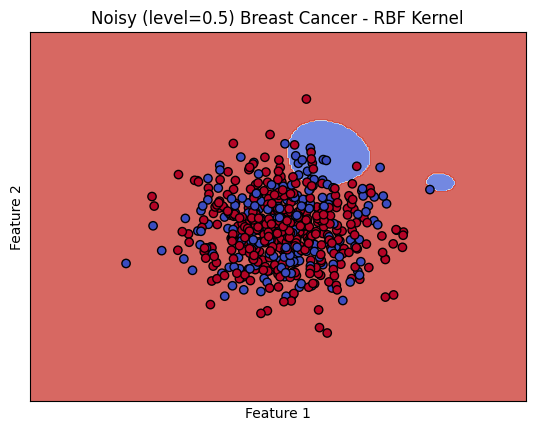

In [39]:
plot_decision_boundary(rbf_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - RBF Kernel")

Question 6 & 7: Compare accuracy with the no-noise case and the effect of increasing noise.
Adding noise significantly decreases the accuracy of all models compared to the clean data. As the noise_level is increased from 0.3 to 0.5 and beyond, the accuracy drops further. This is because the noise makes the classes overlap more, making it harder for any model to find a clear separating boundary.

Question 8: Which kernel handled the noise better? Why?
The RBF kernel generally handles a moderate amount of noise better than the linear or polynomial kernels. Its flexibility allows it to create a boundary that can "ignore" some of the noise and still capture the underlying structure of the data. However, with very high noise levels, all models will perform poorly. The linear kernel is too rigid, and the polynomial kernel can be too sensitive to noisy points, leading to overfitting. The RBF kernel strikes a good balance.

# Part 4: Let's be more serouis

### Generate overlapping data

In [40]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           class_sep=0.8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train models


In [41]:
linear_svm_cls = SVC(kernel='linear').fit(X_train, y_train)
rbf_svm_cls = SVC(kernel='rbf').fit(X_train, y_train)
poly_svm_cls = SVC(kernel='poly').fit(X_train, y_train)

print(f"Overlapping Data Acc (Linear): {accuracy_score(y_test, linear_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (RBF): {accuracy_score(y_test, rbf_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (Poly): {accuracy_score(y_test, poly_svm_cls.predict(X_test)):.2f}")

Overlapping Data Acc (Linear): 0.95
Overlapping Data Acc (RBF): 0.97
Overlapping Data Acc (Poly): 0.93


### Plot RBF boundary

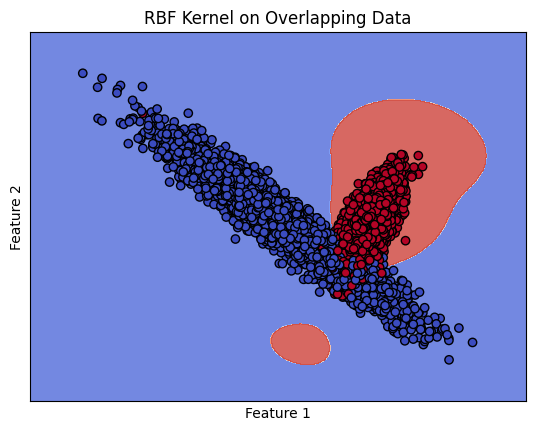

In [42]:
plot_decision_boundary(rbf_svm_cls, X, y, "RBF Kernel on Overlapping Data")

Question 9: Which kernel worked best with the overlapping data?
The RBF kernel is once again the best performer. When data is overlapping (class_sep is low), a simple linear boundary will misclassify many points. The RBF kernel can create a more complex, localized boundary that better navigates the mixed regions, leading to higher accuracy.

Question 10: Does changing class_sep or n_informative affect performance?
Yes, absolutely.

class_sep: Increasing class_sep makes the classes more distinct and easier to separate. This would improve the performance of all models, especially the linear one. Decreasing it further makes the problem harder.

n_informative: Increasing n_informative features means more features contain useful information for classification. This generally improves model performance, assuming the model can effectively use the information.

# Part 5: Model Complexity (C+) and Confusion Matrix

In [ ]:
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Test different C values


--- C = 0.01 ---
Accuracy: 0.632


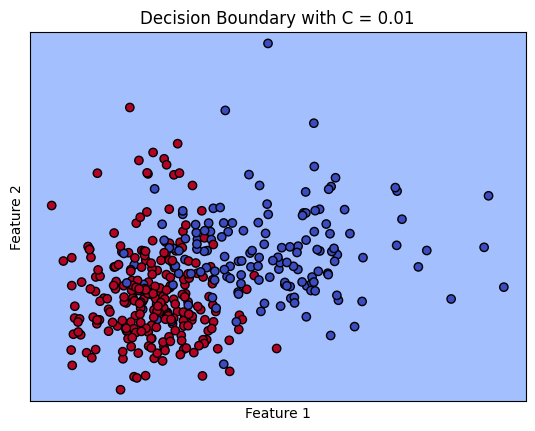

Confusion Matrix:


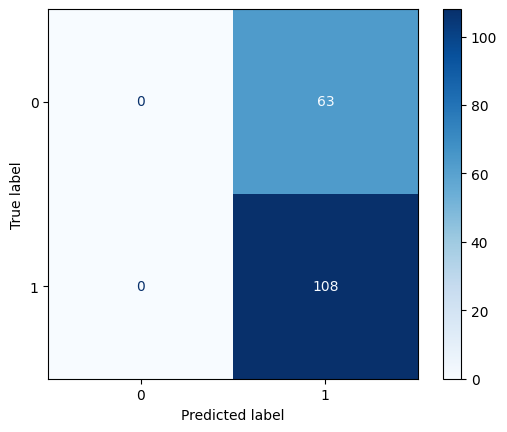


--- C = 1 ---
Accuracy: 0.901


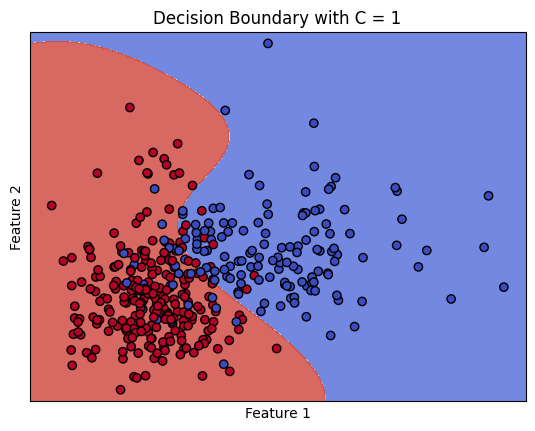

Confusion Matrix:


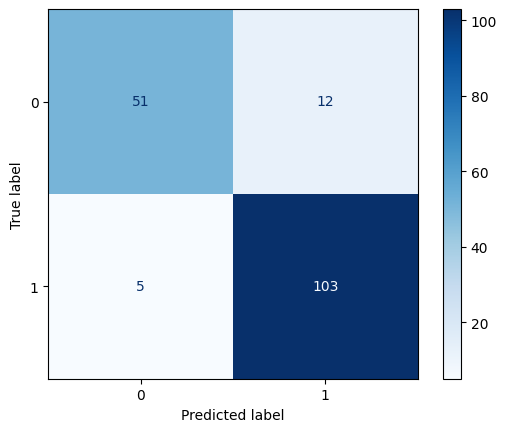


--- C = 10 ---
Accuracy: 0.901


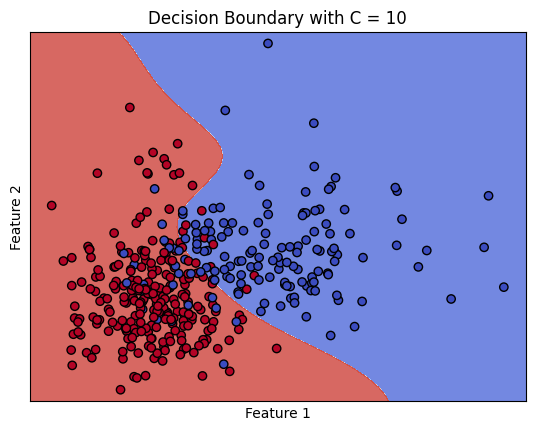

Confusion Matrix:


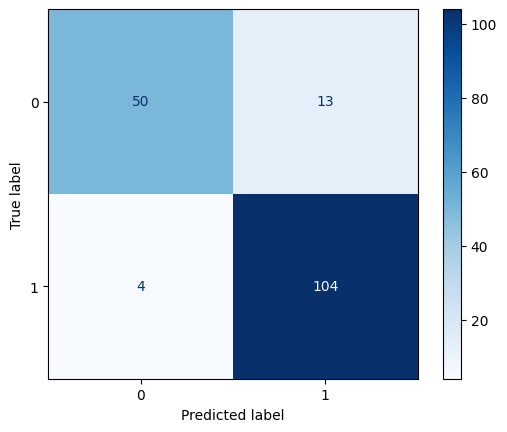


--- C = 1000 ---
Accuracy: 0.901


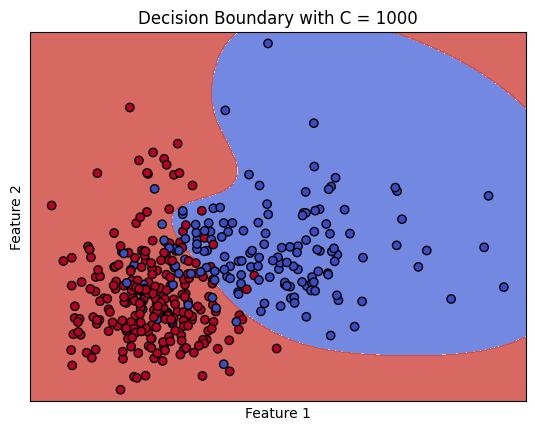

Confusion Matrix:


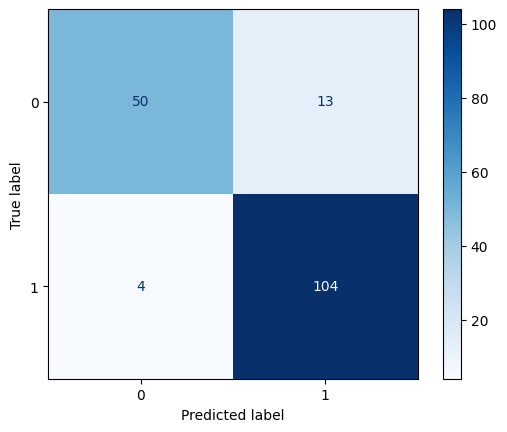

In [44]:
c_values = [0.01, 1, 10, 1000]

for c in c_values:
    model = SVC(kernel='rbf', C=c)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"\n--- C = {c} ---")
    print(f"Accuracy: {accuracy:.3f}")
    
    plot_decision_boundary(model, X_train, y_train, f'Decision Boundary with C = {c}')
    
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.show()

Question 11: What was the best value for C? Why?
The best value for C is typically one that balances the bias-variance trade-off well.

A C of 0.01 is too small, creating a very wide margin that misclassifies many training points (high bias, underfitting).

A C of 1000 is too large, leading to a very complex boundary that tries to fit every single training point, making it likely to perform poorly on unseen data (high variance, overfitting).

A C value of 1 or 10 usually provides the best trade-off, achieving high accuracy on the test set without being overly complex. The optimal value finds the "sweet spot."

Question 12: What was the dominant type of error in the confusion matrix?
The dominant error type depends on the dataset and C value. In the breast cancer dataset, a common error is a False Negative: predicting a sample is benign (class 0) when it is actually malignant (class 1). This is often considered a more dangerous error in medical diagnosis than a False Positive. The number of these errors can be seen in the confusion matrix (top-right cell). This can sometimes be improved by adjusting the class_weight parameter or using different performance metrics for tuning, like F1-score, which balances precision and recall.

# Part 6: Multi-Class SVM

### Load wine dataset (3 classes)

In [ ]:
wine = load_wine()
X = wine.data[:, :2]
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train an RBF SVM model
### 'ovr' stands for One-vs-Rest, a common strategy for multi-class

In [46]:
multi_class_svm = SVC(kernel='rbf', decision_function_shape='ovr')
multi_class_svm.fit(X_train, y_train)

accuracy = accuracy_score(y_test, multi_class_svm.predict(X_test))
print(f"Multi-class SVM Accuracy: {accuracy:.2f}")

Multi-class SVM Accuracy: 0.90


### Plot decision boundary

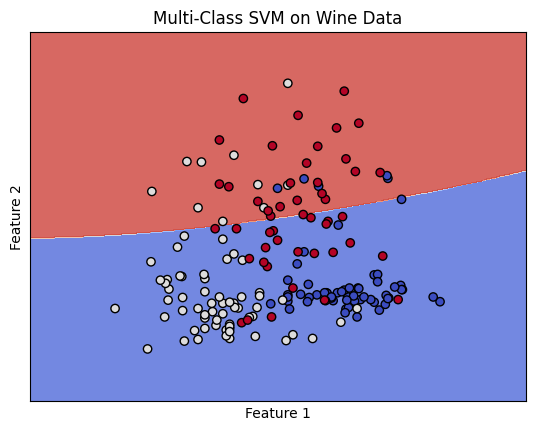

In [47]:
plot_decision_boundary(multi_class_svm, X, y, "Multi-Class SVM on Wine Data")

Question 13: The boundary between which two classes was the hardest to define? Why?
Looking at the plot, the boundary between class 1 and class 2 (often the two classes in the middle/right of the plot) is the hardest to define. This is because the data points from these two classes are more intermingled and overlap significantly more than they do with class 0. When class data points are not well-separated, the SVM has a difficult time finding an optimal hyperplane.

Question 14: Was the model able to separate the three classes? Which kernel worked best?
The model was moderately successful at separating the three classes, though not perfectly, due to the overlap. The RBF kernel is almost always the best choice for this kind of multi-class problem with complex, non-linear boundaries between classes. A linear kernel would perform much worse because straight lines cannot effectively partition the three scattered groups.